In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import pandas as pd

C:\Users\ircguest\.conda\envs\new_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.getcwd()

'C:\\Users\\ircguest\\Downloads\\capstone-eemb-patrick-main\\capstone-eemb-patrick-main\\scripts'

### Rotate and flip the pictures

In [ ]:
def augment_image(src, rot = 2, hflip = True, vflip = True):
    src_image = cv2.imread(src)
    (h,w) = src_image.shape[:2]
    
    if center is None:
        center = (w/2, h/2)
    
    # get random angles for rotation
    angle = np.random.randint(low = 1, high = 359, size = rot)
    
    # perform the rotation
    for i in angle:
        M = cv2.getRotationMatrix2D(center, i, scale = 1.0)
        rotated = cv2.warpAffine(src_image, M, (w,h))
        cv2.imwrite("rot-" + str(i) + "-" + src, rotated)
    

In [30]:
src = "64-coil-0.0.png"
src_image = cv2.imread(src)
(h,w) = src_image.shape[:2]
center = (w/2, h/2)
angle = np.random.randint(low = 1, high = 359, size = 2)
M = cv2.getRotationMatrix2D(center, angle, scale = 1)
M

TypeError: Argument 'angle' can not be treated as a double

### Resize the pictures

In [3]:
def resize_image(src, size = (128, 128)):
    src_image = cv2.imread(src)
    new_image = cv2.resize(src_image, size)
    return new_image

In [4]:
src = "64-coil-0.0.png"
new_image = resize_image(src)
cv2.imwrite("../tryout.png", new_image)

True

In [34]:
for root, folders, files in os.walk(train_folder):
    print(files)

[]
['coil1 (1).jpg', 'coil1 (17).jpg', 'coil1 (18).jpg', 'coil1 (19).jpg', 'coil1 (20).jpg', 'coil1 (21).jpg', 'coil1 (22).jpg', 'coil1 (23).jpg', 'coil1 (24).jpg', 'coil1 (25).jpg', 'coil1 (26).jpg', 'coil1 (27).jpg', 'coil1 (28).jpg', 'coil1 (29).jpg', 'coil1 (30).jpg', 'coil1 (31).jpg', 'coil1 (32).jpg', 'coil1 (33).jpg', 'coil1 (34).jpg', 'coil1 (35).jpg', 'coil1 (36).jpg', 'coil1 (37).jpg', 'coil1 (38).jpg', 'coil1 (39).jpg', 'coil1 (40).jpg', 'coil1 (41).jpg', 'coil1 (42).jpg', 'coil1 (43).jpg', 'coil1 (44).jpg', 'coil1 (45).jpg', 'coil1 (46).jpg', 'coil1 (47).jpg', 'coil1 (48).jpg', 'coil1 (49).jpg', 'coil10 (1).jpg', 'coil10 (10).jpg', 'coil10 (11).jpg', 'coil10 (12).jpg', 'coil10 (13).jpg', 'coil10 (14).jpg', 'coil10 (15).jpg', 'coil10 (16).jpg', 'coil10 (17).jpg', 'coil10 (18).jpg', 'coil10 (19).jpg', 'coil10 (2).jpg', 'coil10 (20).jpg', 'coil10 (21).jpg', 'coil10 (22).jpg', 'coil10 (23).jpg', 'coil10 (24).jpg', 'coil10 (25).jpg', 'coil10 (26).jpg', 'coil10 (27).jpg', 'coil10

In [4]:
# resize all images in the folder to 128 * 128 
train_folder = "C:\\Users\\ircguest\\Downloads\\train"
output_folder = "C:\\Users\\ircguest\\Downloads\\resize-train"

for root, folders, files in os.walk(train_folder):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # create a matching folder in the output dir
        saveFolder = os.path.join(output_folder, sub_folder)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        file_names = os.listdir(os.path.join(root, sub_folder))
        for file_name in file_names:
            # open the file
            file_path = os.path.join(root, sub_folder, file_name)
            
            # resize the image
            new_image = resize_image(file_path)
            
            # get the save directory
            saveAs = os.path.join(saveFolder, file_name)
            
            # save the image
            cv2.imwrite(saveAs, new_image)

print("Done.")

processing folder coil
processing folder spread
processing folder still
processing folder strike
Done.


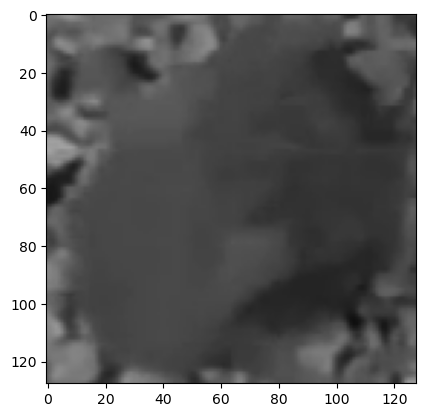

In [5]:
src = 'C:\\Users\\ircguest\\Downloads\\capstone-eemb-patrick-main\\capstone-eemb-patrick-main\\scripts\\64-coil-0.0.png'
new_image = resize_image(src)
plt.imshow(new_image)

### Load the datasets

In [5]:
def load_dataset(data_path):
    # augment the data by random vertical and horizontal flip
    transformation = transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
        # transform to tensors
        transforms.ToTensor(),
        transforms.Grayscale(num_output_channels = 1),
        # normalize the pixel values in R, G, B channels
#         transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5])
        # normalize the pixel values in grayscale channel
        transforms.Normalize(mean = 0.5, std = 0.5)
    ])
    
    # load all the images and transform them
    full_dataset = torchvision.datasets.ImageFolder(
        root = data_path,
        transform = transformation
    )
    
    # split in to training and testing sets
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
#     return train_dataset, test_dataset

    # define a loader for the training data to iterate through 50 images batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size = 32,
        num_workers = 0,
        shuffle = True
    )
    
    # define a loader for the testing data we can iterate through 50 images batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size = 32,
        num_workers = 0,
        shuffle = True
    )
    
    return train_loader, test_loader

In [6]:
train_folder = "C:\\Users\\ircguest\\Downloads\\resize-train"
train_loader, test_loader = load_dataset(train_folder)
# batch_size = train_loader.batch_size
# print("Data loaders ready", train_folder)
# print("Batch size is", batch_size)

In [7]:
# inspect the data in the train loader
for data, target in train_loader:
    print(data.shape)

torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size

In [136]:
# unsqueeze the data
class Unsqueezeit(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
    
    def __getitem__(self, idx):
        tensor = self.data[idx]
        
        # unsqueeze it
        tensor = tensor.unsqueeze(0)
        
        return tensor
    def __len__(self):
        return len(self.data)

data = [torch.randn(3, 128, 128), torch.randn(3, 128, 128), torch.randn(3, 128, 128)]

# Create an instance of the dataset
dataset = Unsqueezeit(data)

# Iterate over the dataset and unsqueeze all tensors
for idx in range(len(dataset)):
    tensor = dataset[idx]
    print(tensor.size())  # Output: torch.Size([1, 3, 128, 128])

torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])


### Define the CNN

In [8]:
class Net(nn.Module): # add nn.module as baseclass(superclass)
    def __init__(self, num_classes):
        super(Net, self).__init__()
        # define each layer we will use in the model
        # since the input images are grayscaled, the input channel is 1
        # the first convolution layer has 12 output channels (12 filters)
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 12, kernel_size = 3, stride =1 , padding = 1)
        
        # the second convolution layer takes 12 inputs and outputs 24, which means 24 filters are used
        self.conv2 = nn.Conv2d(in_channels = 12, out_channels = 24, kernel_size = 3, stride = 1, padding = 1)
        
        self.conv3 = nn.Conv2d(in_channels = 24, out_channels = 48, kernel_size = 3, stride = 1, padding = 1)
        
        # apply max pooling to reduce dimensionality
        self.pool = nn.MaxPool2d(kernel_size = 2)
        
        # A drop layer deletes 20% 
        self.drop = nn.Dropout2d(p = 0.2)
        
        # a 128 image tensors will be pooled twice with a kernel size of 2. 128/2/2/2 = 16
        # thus, we are having 48 features images with size 16x16
        
        # flatten the result
        self.fc = nn.Linear(in_features = 16 * 16 * 48, out_features = num_classes)
        
    def forward(self, x):
        # pass the data through the layers we defined in the init function
        
        # use a ReLU activation function after layer 1 and 2
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        
        x = F.dropout(self.drop(x), training = self.training)
        
        # Flatten
        x = x.view(-1, 16 * 16 * 48)
        # feed to fully-connected layer to predict class
        x = self.fc(x)
        # return class probabilities via a log_softmax function
        return torch.log_softmax(x, dim = 1)
    
device = "cpu"
if (torch.cuda.is_available()):
    device = "cuda"
model = Net(num_classes = 4).to(device)

print(model)


Net(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=12288, out_features=4, bias=True)
)


In [9]:
# train function 
def train(model, device, train_loader, optimizer, epoch):
    # set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    for batch_idx, (data, target) in enumerate(train_loader):
        # use the cpu or gpu as appropriate
        data, target = data.to(device), target.to(device)
        
        # reset the optimizer
        optimizer.zero_grad()
        
        # push the data forward throught the model layers
        output = model(data)
        
        # get the loss
        loss = loss_criteria(output, target)
        
        # keep a running total
        train_loss += loss.item()
        
        # backpropagate
        loss.backward()
        optimizer.step()
        
        # print metrices so we can see more progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
        
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx + 1)
    print('Training set: Average loss: {:.6f}'. format(avg_loss))
    return avg_loss

In [10]:
# test function
def test(model, device, test_loader):
    # switch the model to evaluation mode
    # no backpropagation or drop
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # get the predicted classes for this batch 
            output = model(data)
            
            # calculate the loss for this batch 
            test_loss += loss_criteria(output, target).item()
            
            # calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}. Accuracy: {}/{} ({:.0f}%)\n'. format(
        avg_loss, correct, len(test_loader.dataset), 
    100. * correct / len(test_loader.dataset)))
    return avg_loss

In [137]:
output = torch.tensor([[0.2, 0.5, 0.8], 
                      [0.6, 0.3, 0.9]])
max_values, max_indices = torch.max(output.data, 0)
print(max_values)
print(max_indices)

tensor([0.6000, 0.5000, 0.9000])
tensor([1, 0, 1])


In [11]:
# use an "Adam" optimizer to adjust weights
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track matrices in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# train over 10 epochs 
epochs = 20
for epoch in range(1, epochs + 1):
    train_loss = train(model, device, train_loader, optimizer, epoch)
    test_loss = test(model, device, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
	Training batch 1 Loss: 1.379114
	Training batch 2 Loss: 0.975022
	Training batch 3 Loss: 1.132677
	Training batch 4 Loss: 1.020369
	Training batch 5 Loss: 1.032393
	Training batch 6 Loss: 1.159379
	Training batch 7 Loss: 0.785776
	Training batch 8 Loss: 1.091893
	Training batch 9 Loss: 0.824582
	Training batch 10 Loss: 1.009424
	Training batch 11 Loss: 1.012339
	Training batch 12 Loss: 0.729016
	Training batch 13 Loss: 0.943807
	Training batch 14 Loss: 0.872525
	Training batch 15 Loss: 0.679467
	Training batch 16 Loss: 1.050618
	Training batch 17 Loss: 0.905388
	Training batch 18 Loss: 0.808788
	Training batch 19 Loss: 0.564478
	Training batch 20 Loss: 0.876400
	Training batch 21 Loss: 0.775078
	Training batch 22 Loss: 0.456549
	Training batch 23 Loss: 0.871115
	Training batch 24 Loss: 0.772051
	Training batch 25 Loss: 0.593747
	Training batch 26 Loss: 0.681850
	Training batch 27 Loss: 0.633862
	Training batch 28 Loss: 0.387764
	Training batch 29 Loss: 0.322275
	Training batc

	Training batch 58 Loss: 0.099519
	Training batch 59 Loss: 0.499342
Training set: Average loss: 0.183570
Validation set: Average loss: 0.179462. Accuracy: 756/801 (94%)

Epoch: 5
	Training batch 1 Loss: 0.112033
	Training batch 2 Loss: 0.179427
	Training batch 3 Loss: 0.198807
	Training batch 4 Loss: 0.316095
	Training batch 5 Loss: 0.360855
	Training batch 6 Loss: 0.046766
	Training batch 7 Loss: 0.116921
	Training batch 8 Loss: 0.218643
	Training batch 9 Loss: 0.109813
	Training batch 10 Loss: 0.286152
	Training batch 11 Loss: 0.347772
	Training batch 12 Loss: 0.077710
	Training batch 13 Loss: 0.126658
	Training batch 14 Loss: 0.190352
	Training batch 15 Loss: 0.073663
	Training batch 16 Loss: 0.235364
	Training batch 17 Loss: 0.270242
	Training batch 18 Loss: 0.076568
	Training batch 19 Loss: 0.019945
	Training batch 20 Loss: 0.152120
	Training batch 21 Loss: 0.166287
	Training batch 22 Loss: 0.134499
	Training batch 23 Loss: 0.078123
	Training batch 24 Loss: 0.155791
	Training batc

	Training batch 51 Loss: 0.201243
	Training batch 52 Loss: 0.108580
	Training batch 53 Loss: 0.179717
	Training batch 54 Loss: 0.047455
	Training batch 55 Loss: 0.023029
	Training batch 56 Loss: 0.035891
	Training batch 57 Loss: 0.042641
	Training batch 58 Loss: 0.048854
	Training batch 59 Loss: 0.003141
Training set: Average loss: 0.097349
Validation set: Average loss: 0.099146. Accuracy: 774/801 (97%)

Epoch: 9
	Training batch 1 Loss: 0.157423
	Training batch 2 Loss: 0.008167
	Training batch 3 Loss: 0.107543
	Training batch 4 Loss: 0.050386
	Training batch 5 Loss: 0.005579
	Training batch 6 Loss: 0.080946
	Training batch 7 Loss: 0.108884
	Training batch 8 Loss: 0.060495
	Training batch 9 Loss: 0.057631
	Training batch 10 Loss: 0.062337
	Training batch 11 Loss: 0.128777
	Training batch 12 Loss: 0.316200
	Training batch 13 Loss: 0.119774
	Training batch 14 Loss: 0.058350
	Training batch 15 Loss: 0.082017
	Training batch 16 Loss: 0.194939
	Training batch 17 Loss: 0.016393
	Training batc

	Training batch 46 Loss: 0.103862
	Training batch 47 Loss: 0.007023
	Training batch 48 Loss: 0.024055
	Training batch 49 Loss: 0.317358
	Training batch 50 Loss: 0.055762
	Training batch 51 Loss: 0.111706
	Training batch 52 Loss: 0.018899
	Training batch 53 Loss: 0.016061
	Training batch 54 Loss: 0.015886
	Training batch 55 Loss: 0.110273
	Training batch 56 Loss: 0.097580
	Training batch 57 Loss: 0.031609
	Training batch 58 Loss: 0.137578
	Training batch 59 Loss: 0.006582
Training set: Average loss: 0.077059
Validation set: Average loss: 0.069544. Accuracy: 785/801 (98%)

Epoch: 13
	Training batch 1 Loss: 0.036240
	Training batch 2 Loss: 0.008455
	Training batch 3 Loss: 0.000963
	Training batch 4 Loss: 0.000288
	Training batch 5 Loss: 0.021699
	Training batch 6 Loss: 0.050842
	Training batch 7 Loss: 0.000790
	Training batch 8 Loss: 0.011247
	Training batch 9 Loss: 0.275131
	Training batch 10 Loss: 0.033827
	Training batch 11 Loss: 0.033567
	Training batch 12 Loss: 0.072857
	Training bat

	Training batch 41 Loss: 0.114468
	Training batch 42 Loss: 0.075348
	Training batch 43 Loss: 0.024739
	Training batch 44 Loss: 0.030504
	Training batch 45 Loss: 0.026910
	Training batch 46 Loss: 0.024006
	Training batch 47 Loss: 0.232096
	Training batch 48 Loss: 0.044086
	Training batch 49 Loss: 0.034188
	Training batch 50 Loss: 0.054714
	Training batch 51 Loss: 0.028424
	Training batch 52 Loss: 0.017074
	Training batch 53 Loss: 0.048209
	Training batch 54 Loss: 0.018190
	Training batch 55 Loss: 0.004806
	Training batch 56 Loss: 0.087772
	Training batch 57 Loss: 0.022095
	Training batch 58 Loss: 0.003418
	Training batch 59 Loss: 0.001633
Training set: Average loss: 0.062768
Validation set: Average loss: 0.063682. Accuracy: 790/801 (99%)

Epoch: 17
	Training batch 1 Loss: 0.291365
	Training batch 2 Loss: 0.000763
	Training batch 3 Loss: 0.057277
	Training batch 4 Loss: 0.217012
	Training batch 5 Loss: 0.020567
	Training batch 6 Loss: 0.008934
	Training batch 7 Loss: 0.034013
	Training b

	Training batch 34 Loss: 0.002568
	Training batch 35 Loss: 0.070043
	Training batch 36 Loss: 0.110094
	Training batch 37 Loss: 0.001421
	Training batch 38 Loss: 0.076906
	Training batch 39 Loss: 0.014485
	Training batch 40 Loss: 0.051676
	Training batch 41 Loss: 0.020938
	Training batch 42 Loss: 0.019529
	Training batch 43 Loss: 0.043689
	Training batch 44 Loss: 0.015269
	Training batch 45 Loss: 0.122549
	Training batch 46 Loss: 0.090531
	Training batch 47 Loss: 0.005122
	Training batch 48 Loss: 0.007431
	Training batch 49 Loss: 0.003476
	Training batch 50 Loss: 0.008012
	Training batch 51 Loss: 0.015279
	Training batch 52 Loss: 0.004093
	Training batch 53 Loss: 0.003955
	Training batch 54 Loss: 0.052955
	Training batch 55 Loss: 0.006424
	Training batch 56 Loss: 0.000326
	Training batch 57 Loss: 0.009894
	Training batch 58 Loss: 0.097966
	Training batch 59 Loss: 0.007360
Training set: Average loss: 0.035300
Validation set: Average loss: 0.068266. Accuracy: 788/801 (98%)



### Plot loss history

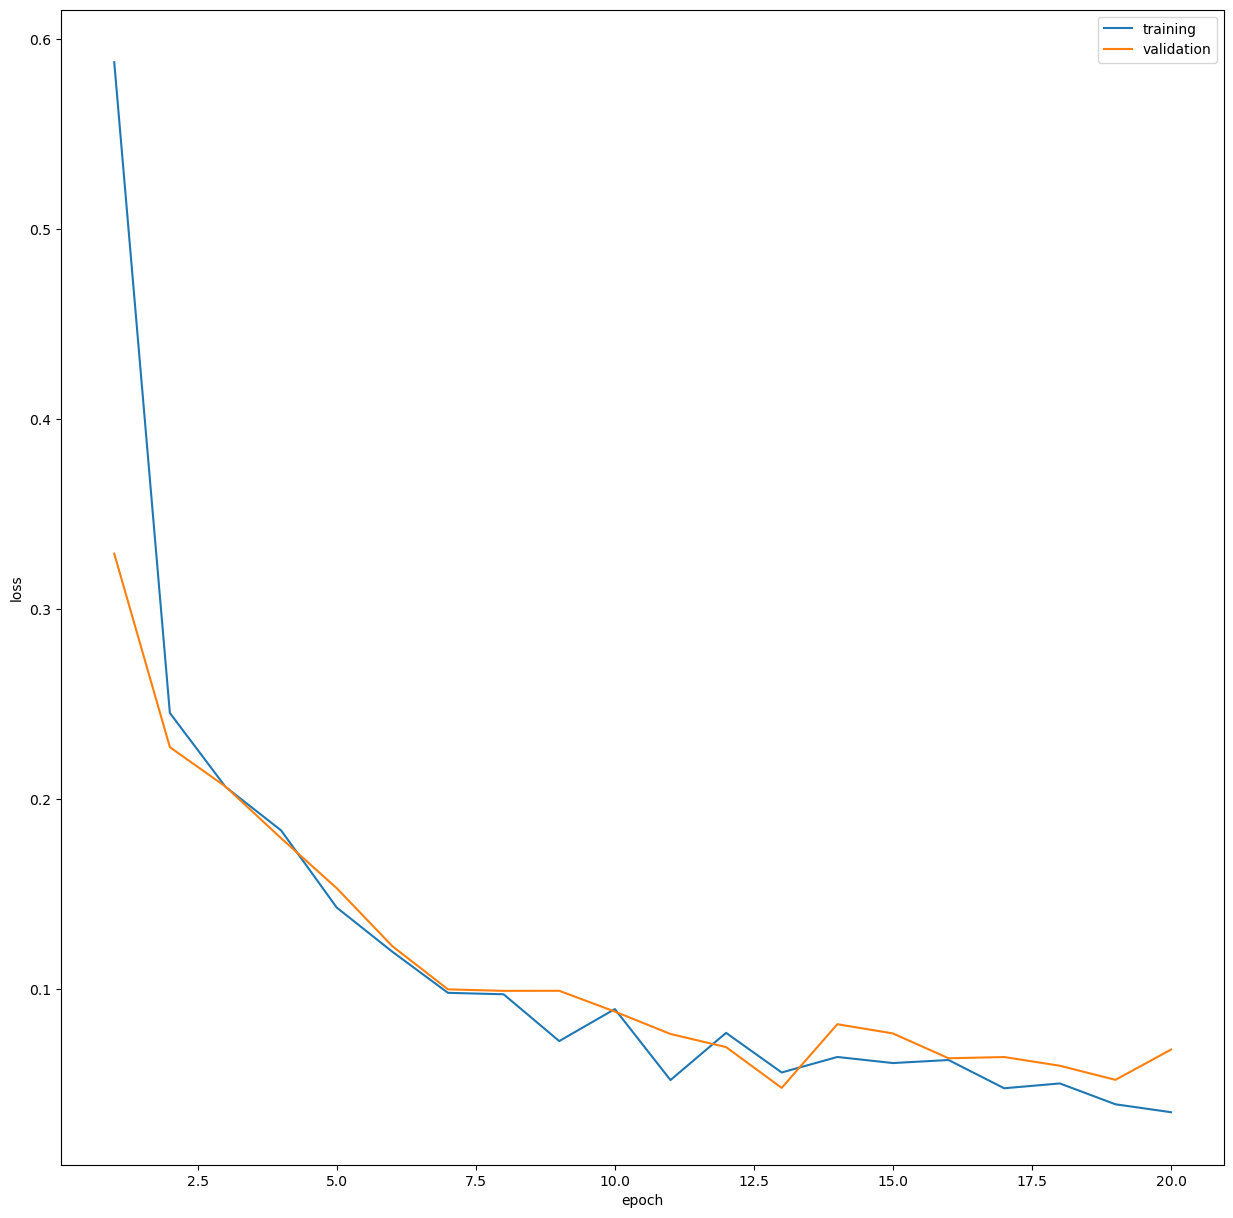

In [12]:
plt.figure(figsize = (15,15))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc = 'upper right')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns

In [14]:
classes = sorted(os.listdir(train_folder))
print(classes)

['coil', 'spread', 'still', 'strike']


Getting predictions from test set...


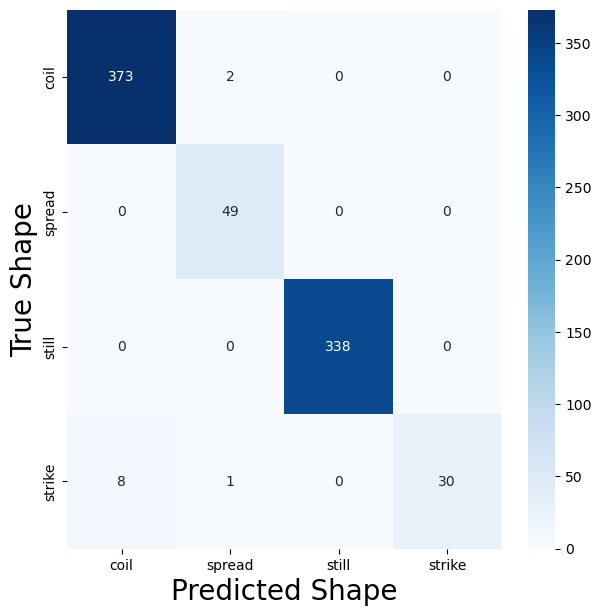

In [15]:
# Defining Labes and Predictions
truelabels = []
predictions = []
model.eval()
print("Getting predictions from test set...")
for data, target in test_loader:
    for label in target.data.numpy():
        truelabels.append(label)
    for prediction in model(data).data.numpy().argmax(1):
        predictions.append(prediction)
        
# plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(classes))

df_cm = pd.DataFrame(cm, index = classes, columns = classes)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

### Make Predictions

In [16]:
trans = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels = 1),
    transforms.Normalize(mean = 0.5, std = 0.5)
])

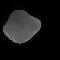

In [25]:
from PIL import Image
image = Image.open('C:\\Users\\ircguest\\Downloads\\train\\spread\\spread5 (43).jpg')
image

In [26]:
pred_data = trans(image)
pred_data = pred_data.view(1,1,128,128)
output = model(pred_data)
prediction = int(torch.max(output.data, 1)[1].numpy())
print(prediction)

1


In [20]:
output

tensor([[-7.2510e+00, -2.0518e+01, -2.7628e+01, -7.0976e-04]],
       grad_fn=<LogSoftmaxBackward0>)

### Save and Load

In [206]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
conv1.weight 	 torch.Size([12, 1, 3, 3])
conv1.bias 	 torch.Size([12])
conv2.weight 	 torch.Size([24, 12, 3, 3])
conv2.bias 	 torch.Size([24])
conv3.weight 	 torch.Size([48, 24, 3, 3])
conv3.bias 	 torch.Size([48])
fc.weight 	 torch.Size([4, 12288])
fc.bias 	 torch.Size([4])


In [210]:
PATH = "C:\\Users\\ircguest\\Downloads\\model\\3-layers-model.pt"

In [209]:
torch.save(model.state_dict(), PATH)

In [268]:
model = Net(num_classes = 4)
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=12288, out_features=4, bias=True)
)